In [9]:
import pandas as pd

# Function to read the custom CSV format
def read_custom_format(filepath):
    with open(filepath, 'r') as f:
        lines = f.read().splitlines()

    data = []
    for line in lines[1:]:  # Skip the first line
        fields = line.split(',')
        carId, rsuId = fields[0], fields[1]
        messageCount = int(fields[2])
        timestamps = list(map(int, fields[3:]))
        data.append([carId, rsuId, messageCount, timestamps])

    return pd.DataFrame(data, columns=['CarId', 'RSUId', 'MessageCount', 'Timestamps'])

# Extracting the message counts
def extract_message_counts(df, all_rsus):
    counts = df.groupby('RSUId').MessageCount.sum().to_dict()
    return [counts.get(rsu, 0) for rsu in all_rsus]

# Reading data from uploaded files again
base_preds_df = read_custom_format('base_preds.csv')
plus1_actual_preds_df = read_custom_format('+1_actual_preds.csv')
plus2_actual_preds_df = read_custom_format('+2_actual_preds.csv')
plus3_actual_preds_df = read_custom_format('+3_actual_preds.csv')
plus10_actual_preds_df = read_custom_format('+10_actual_preds.csv')
plus20_actual_preds_df = read_custom_format('+20_actual_preds.csv')
plus30_actual_preds_df = read_custom_format('+30_actual_preds.csv')

# Extracting all unique RSU IDs
all_rsus = sorted(list(set(base_preds_df["RSUId"]) | 
                       set(plus1_actual_preds_df["RSUId"]) | 
                       set(plus2_actual_preds_df["RSUId"]) |
                       set(plus3_actual_preds_df["RSUId"]) | 
                       set(plus10_actual_preds_df["RSUId"]) | 
                       set(plus20_actual_preds_df["RSUId"]) | 
                       set(plus30_actual_preds_df["RSUId"])))

# Extracting message counts for each scenario
base_message_counts = extract_message_counts(base_preds_df, all_rsus)
plus1_message_counts = extract_message_counts(plus1_actual_preds_df, all_rsus)
plus2_message_counts = extract_message_counts(plus2_actual_preds_df, all_rsus)
plus3_message_counts = extract_message_counts(plus3_actual_preds_df, all_rsus)
plus10_message_counts = extract_message_counts(plus10_actual_preds_df, all_rsus)
plus20_message_counts = extract_message_counts(plus20_actual_preds_df, all_rsus)
plus30_message_counts = extract_message_counts(plus30_actual_preds_df, all_rsus)

base_message_counts, plus1_message_counts, plus2_message_counts, plus3_message_counts, plus10_message_counts, plus20_message_counts, plus30_message_counts


([6, 25, 26, 6, 19, 5, 7, 12, 1],
 [6, 26, 25, 5, 19, 5, 7, 12, 2],
 [6, 27, 7, 5, 19, 6, 9, 14, 3],
 [7, 27, 3, 7, 20, 5, 8, 14, 4],
 [8, 31, 14, 7, 23, 7, 11, 17, 7],
 [10, 39, 35, 7, 29, 7, 17, 24, 13],
 [11, 46, 42, 9, 33, 9, 15, 30, 18])

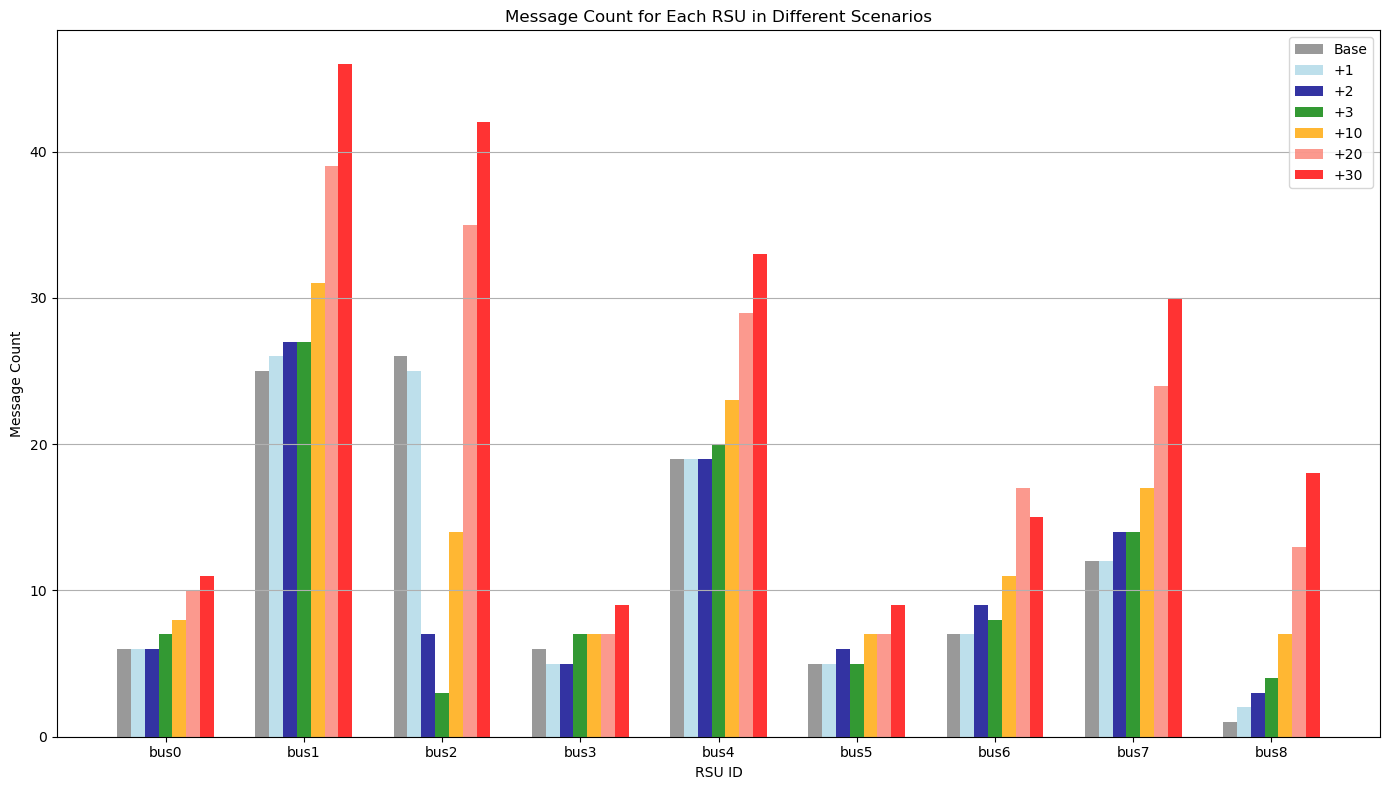

In [7]:
import matplotlib.pyplot as plt

# Initialize the figure and set its size
plt.figure(figsize=(14, 8))

# Colors for presentation
presentation_colors = ['gray', 'lightblue', 'darkblue', 'green', 'orange', 'salmon', 'red']
bar_width = 0.1
index = range(len(all_rsus))

# Plot bars for each scenario
plt.bar(index, base_message_counts, bar_width, label="Base", color=presentation_colors[0], alpha=0.8)
plt.bar([i + bar_width for i in index], plus1_message_counts, bar_width, label="+1", color=presentation_colors[1], alpha=0.8)
plt.bar([i + 2*bar_width for i in index], plus2_message_counts, bar_width, label="+2", color=presentation_colors[2], alpha=0.8)
plt.bar([i + 3*bar_width for i in index], plus3_message_counts, bar_width, label="+3", color=presentation_colors[3], alpha=0.8)
plt.bar([i + 4*bar_width for i in index], plus10_message_counts, bar_width, label="+10", color=presentation_colors[4], alpha=0.8)
plt.bar([i + 5*bar_width for i in index], plus20_message_counts, bar_width, label="+20", color=presentation_colors[5], alpha=0.8)
plt.bar([i + 6*bar_width for i in index], plus30_message_counts, bar_width, label="+30", color=presentation_colors[6], alpha=0.8)

# Setting the labels, title, and legend
plt.xlabel('RSU ID')
plt.ylabel('Message Count')
plt.title('Message Count for Each RSU in Different Scenarios')
plt.xticks([i + bar_width*3 for i in index], all_rsus)  # Adjust the position of x-ticks to be in the center of bars
plt.legend()
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()